<a href="https://colab.research.google.com/github/Moechinehaa/NLP_chinese_spicychatbot/blob/main/preprocess_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import xmltodict
import json
import pandas as pd

with open('ExpressionTest.xml') as td:
    dictionary = xmltodict.parse(td.read())
test = json.dumps(dictionary,ensure_ascii=False).encode('utf8')

with open("ExpressionTest.json","w") as expresstest:
  expresstest.write(test.decode('utf8'))

In [ ]:
df = pd.read_json("ExpressionTest.json")
weibo = df.head().TestData.weibo
weibo_df = pd.DataFrame(weibo)
weibo_df.head()

,@id,@emotion-type1,@emotion-type2,sentence
0,1,happiness,none,"[{'@id': '1', '@opinionated': 'Y', '@emotion-1..."
1,2,happiness,none,"{'@id': '1', '@opinionated': 'Y', '@emotion-1-..."
2,3,disgust,none,"{'@id': '1', '@opinionated': 'Y', '@emotion-1-..."
3,4,disgust,none,"[{'@id': '1', '@opinionated': 'Y', '@emotion-1..."
4,5,like,none,"[{'@id': '1', '@opinionated': 'Y', '@emotion-1..."


In [ ]:
weibo_df_2 = weibo_df

In [ ]:
for index in range(2000):
  strsen = str(weibo_df_2.sentence[index])
  if(strsen[0]) is not '[':
    weibo_df_2.sentence[index] = [weibo_df.sentence[index]]

In [ ]:
weibo_df_2.head()

,@id,@emotion-type1,@emotion-type2,sentence
0,1,happiness,none,"[{'@id': '1', '@opinionated': 'Y', '@emotion-1..."
1,2,happiness,none,"[{'@id': '1', '@opinionated': 'Y', '@emotion-1..."
2,3,disgust,none,"[{'@id': '1', '@opinionated': 'Y', '@emotion-1..."
3,4,disgust,none,"[{'@id': '1', '@opinionated': 'Y', '@emotion-1..."
4,5,like,none,"[{'@id': '1', '@opinionated': 'Y', '@emotion-1..."


TODO 
=> 將各句sentence結合成一篇文章

In [ ]:
ini_df = pd.DataFrame()
for row in range(2000):
  sen_dict = weibo_df_2.sentence[row]
  sen_now_df = pd.DataFrame(sen_dict)
  ini_df = pd.concat([ini_df,sen_now_df],axis=0)
  #ini_df.head()
print("done")
ini_df.tail()

done


,@id,@opinionated,@emotion-1-type,@emotion-2-type,@keyexpression1,#text,@keyexpression2
1,2,N,NaN,NaN,null,"而后来的历史因记忆模糊没有完全记住,所以相当于在阅读新知识.",NaN
2,3,Y,surprise,none,null,"我非常好奇后来历史怎么走到辛亥革命的,中间又发生了什么?",NaN
3,4,Y,like,none,心情激动,心情激动!,NaN
4,5,Y,happiness,none,null,看书啦!,NaN
5,6,Y,happiness,none,null,[哈哈]我是时空穿梭者～,NaN


In [ ]:
ini_df.head()

,@id,@opinionated,@emotion-1-type,@emotion-2-type,@keyexpression1,#text,@keyexpression2
0,1,Y,happiness,none,哈哈,凑合看吧，哈哈！,NaN
1,2,N,NaN,NaN,null,不知道她会喜欢吗？,NaN
0,1,Y,happiness,none,很荣幸,很荣幸 崔莲姬能与成方圆老师，李光曦老师，李谷一老师同台，很荣幸~ 也很感谢大家对 新版哆来...,NaN
0,1,Y,disgust,none,真不咋地,眨眼5.1了，两眼一睁我就到伟大的祖国首都了，可是花90块钱住了个济南三十块钱的宾馆，上厕所...,这么差劲
0,1,Y,disgust,none,大烂片,昨天看了《特工邵特》，实在后悔，大烂片。,NaN


In [ ]:
sentence_df = pd.DataFrame()
sentence_df['emotion_1'] = ini_df['@emotion-1-type']
sentence_df['emotion_2'] = ini_df['@emotion-2-type']
sentence_df['keyexpression1'] = ini_df['@keyexpression1']
sentence_df['text'] = ini_df['#text']

In [ ]:
sentence_df.head()

,emotion_1,emotion_2,keyexpression1,text
0,happiness,none,哈哈,凑合看吧，哈哈！
1,NaN,NaN,null,不知道她会喜欢吗？
0,happiness,none,很荣幸,很荣幸 崔莲姬能与成方圆老师，李光曦老师，李谷一老师同台，很荣幸~ 也很感谢大家对 新版哆来...
0,disgust,none,真不咋地,眨眼5.1了，两眼一睁我就到伟大的祖国首都了，可是花90块钱住了个济南三十块钱的宾馆，上厕所...
0,disgust,none,大烂片,昨天看了《特工邵特》，实在后悔，大烂片。


In [ ]:
sentence_df.head()

,emotion_1,emotion_2,keyexpression1,text
0,happiness,none,哈哈,凑合看吧，哈哈！
1,NaN,NaN,null,不知道她会喜欢吗？
0,happiness,none,很荣幸,很荣幸 崔莲姬能与成方圆老师，李光曦老师，李谷一老师同台，很荣幸~ 也很感谢大家对 新版哆来...
0,disgust,none,真不咋地,眨眼5.1了，两眼一睁我就到伟大的祖国首都了，可是花90块钱住了个济南三十块钱的宾馆，上厕所...
0,disgust,none,大烂片,昨天看了《特工邵特》，实在后悔，大烂片。


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opencc-python-reimplemented

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from transformers import BertTokenizer
from IPython.display import clear_output
from opencc import OpenCC

cc = OpenCC("s2tw")
text = "昨天看了《特工邵特》，实在后悔，大烂片。"
cc.convert(text)

'昨天看了《特工邵特》，實在後悔，大爛片。'

In [ ]:
textlist = []
for row in sentence_df["text"]:
  textlist.append(cc.convert(row))

In [ ]:
sentence_df = sentence_df.reset_index()
sentence_df = sentence_df.drop(['index'],axis=1)

In [ ]:
textDataframe = pd.DataFrame(textlist)
TaiwanSentence_df = pd.concat([sentence_df,textDataframe],axis=1)
TaiwanSentence_df = TaiwanSentence_df.rename({0:'taiwantext'},axis=1)
TaiwanSentence_df.head()

,emotion_1,emotion_2,keyexpression1,text,taiwantext
0,happiness,none,哈哈,凑合看吧，哈哈！,湊合看吧，哈哈！
1,NaN,NaN,null,不知道她会喜欢吗？,不知道她會喜歡嗎？
2,happiness,none,很荣幸,很荣幸 崔莲姬能与成方圆老师，李光曦老师，李谷一老师同台，很荣幸~ 也很感谢大家对 新版哆来...,很榮幸 崔蓮姬能與成方圓老師，李光曦老師，李谷一老師同臺，很榮幸~ 也很感謝大家對 新版哆來...
3,disgust,none,真不咋地,眨眼5.1了，两眼一睁我就到伟大的祖国首都了，可是花90块钱住了个济南三十块钱的宾馆，上厕所...,眨眼5.1了，兩眼一睜我就到偉大的祖國首都了，可是花90塊錢住了個濟南三十塊錢的賓館，上廁所...
4,disgust,none,大烂片,昨天看了《特工邵特》，实在后悔，大烂片。,昨天看了《特工邵特》，實在後悔，大爛片。


In [ ]:
bertInput_df = pd.concat([TaiwanSentence_df.emotion_1,TaiwanSentence_df.taiwantext],axis=1)
bertInput_df.head()

,emotion_1,taiwantext
0,happiness,湊合看吧，哈哈！
1,NaN,不知道她會喜歡嗎？
2,happiness,很榮幸 崔蓮姬能與成方圓老師，李光曦老師，李谷一老師同臺，很榮幸~ 也很感謝大家對 新版哆來...
3,disgust,眨眼5.1了，兩眼一睜我就到偉大的祖國首都了，可是花90塊錢住了個濟南三十塊錢的賓館，上廁所...
4,disgust,昨天看了《特工邵特》，實在後悔，大爛片。


In [ ]:
bertInput_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7020 entries, 0 to 7019
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   emotion_1   4261 non-null   object
 1   taiwantext  7020 non-null   object
dtypes: object(2)
memory usage: 109.8+ KB


In [ ]:
bertInput_df = bertInput_df.fillna('none')
bertInput_df.head()

,emotion_1,taiwantext
0,happiness,湊合看吧，哈哈！
1,none,不知道她會喜歡嗎？
2,happiness,很榮幸 崔蓮姬能與成方圓老師，李光曦老師，李谷一老師同臺，很榮幸~ 也很感謝大家對 新版哆來...
3,disgust,眨眼5.1了，兩眼一睜我就到偉大的祖國首都了，可是花90塊錢住了個濟南三十塊錢的賓館，上廁所...
4,disgust,昨天看了《特工邵特》，實在後悔，大爛片。


In [ ]:
bertInput_df[bertInput_df.emotion_1.isnull()]

,emotion_1,taiwantext


In [ ]:
PRETRAINED_MODEL_NAME = "bert-base-chinese"
tockenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)
clear_output()
print(torch.__version__)

1.11.0+cu113


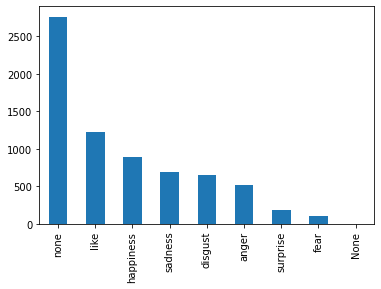

In [ ]:
bertInput_df.emotion_1.value_counts().plot(kind='bar')

In [ ]:
bertInput_df.emotion_1 = bertInput_df.emotion_1.replace({'none':0,'happiness':2,'like':1,'sadness':3,'disgust':4,'anger':5,'surprise':6,'fear':7})

In [ ]:
bertInput_df[bertInput_df.emotion_1.isnull()]

,emotion_1,taiwantext


In [ ]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(bertInput_df,test_size=0.2)

In [ ]:
print(train_df.shape)
print(bertInput_df.shape)
test_df.shape

(5616, 2)
(7020, 2)


(1404, 2)

In [ ]:
test_df[test_df.emotion_1.isnull()]

,emotion_1,taiwantext


In [ ]:
train_df.to_csv("train.tsv",sep='\t',index=False)
test_df.to_csv("test.tsv",sep='\t',index=False)